In [2]:
# Sampling Tech
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset into DataFrame
iris = load_iris(as_frame=True)
df = iris.frame
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Probabilstic Sampling Mthods

In [3]:
# 1.1 Simple Random Sampling
# Select n rows uniformly at random.

# Simple random sample of 50 observations
simple_rand = df.sample(n=50, random_state=42)
print(simple_rand.shape)

(50, 5)


In [4]:
# 1.2 Systematic Sampling
# Choose every kᵗʰ record after a random start.
def systematic_sampling(data, k, seed=42):
    np.random.seed(seed)
    start = np.random.randint(0, k)
    indices = np.arange(start, len(data), k)
    return data.iloc[indices]

# Every 10th after a random start
sys_sample = systematic_sampling(df, k=10)
print(sys_sample.shape)


(15, 5)


In [5]:
# 1.3 Stratified Random Sampling
# Sample within each class proportional to its size.
# Stratified sample: 30% from each species
strata = df.groupby('target', group_keys=False).apply(
    lambda x: x.sample(frac=0.3, random_state=42)
)
print(strata['target'].value_counts(normalize=True))


target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


/tmp/ipython-input-3070871200.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strata = df.groupby('target', group_keys=False).apply(


In [6]:
# 1.4 Cluster Sampling
# Randomly select entire clusters, then use all items in chosen clusters.

# Define clusters by rounding sepal length
df['cluster'] = (df['sepal length (cm)'] // 1).astype(int)
clusters = df['cluster'].unique()

# Randomly pick 2 clusters
chosen = np.random.choice(clusters, size=2, replace=False)
cluster_sample = df[df['cluster'].isin(chosen)]
print("Clusters chosen:", chosen)
print(cluster_sample['cluster'].value_counts())

Clusters chosen: [4 7]
cluster
4    22
7    13
Name: count, dtype: int64


Non-Probabilistic Sampling Methods

In [7]:
# 2.1 Convenience Sampling
# Select the first n rows or any easily accessible subset.
# First 50 rows as a convenience sample
convenience = df.head(50)
print(convenience.shape)

(50, 6)


In [8]:
# 2.2 Judgmental (Selective) Sampling
# Manually pick samples based on domain knowledge.
# E.g., pick all Setosa and first 10 Versicolor
judgmental = pd.concat([
    df[df['target'] == 0],
    df[df['target'] == 1].head(10)
])
print(judgmental['target'].value_counts())

target
0    50
1    10
Name: count, dtype: int64


In [9]:
# 2.3 Snowball Sampling
# Begin with a small seed and expand via similarity (simulated by nearest neighbors here).
from sklearn.neighbors import NearestNeighbors

# Seed: pick 5 random points
seed = df.sample(n=5, random_state=42)
nbrs = NearestNeighbors(n_neighbors=3).fit(df.drop(columns=['target','cluster']))
distances, indices = nbrs.kneighbors(seed.drop(columns=['target','cluster']))

# Snowball: union of seed and their neighbors
snowball_idx = set(seed.index)
for neigh in indices:
    snowball_idx.update(neigh)
snowball = df.loc[list(snowball_idx)]
print(snowball.shape)

(13, 6)


In [10]:
# 2.4 Quota Sampling
# Ensure the sample meets predefined quotas for each stratum.
# Quotas: 20 Setosa, 15 Versicolor, 10 Virginica
quota = pd.concat([
    df[df['target']==0].sample(n=20, random_state=42),
    df[df['target']==1].sample(n=15, random_state=42),
    df[df['target']==2].sample(n=10, random_state=42)
])
print(quota['target'].value_counts())

target
0    20
1    15
2    10
Name: count, dtype: int64


Compare Sample Sizes and Class Distributions

In [11]:
# Create a dictionary of sample sets to compare
samples = {
    'Simple Random': simple_rand,
    'Systematic': sys_sample,
    'Stratified': strata,
    'Cluster': cluster_sample,
    'Convenience': convenience,
    'Judgmental': judgmental,
    'Snowball': snowball,
    'Quota': quota
}

# Print sample sizes and class distribution
for name, sample in samples.items():
    print(f"\n{name} Sample:")
    print("Sample size:", sample.shape[0])
    print("Class distribution:\n", sample['target'].value_counts(normalize=True))


Simple Random Sample:
Sample size: 50
Class distribution:
 target
0    0.38
2    0.32
1    0.30
Name: proportion, dtype: float64

Systematic Sample:
Sample size: 15
Class distribution:
 target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Stratified Sample:
Sample size: 45
Class distribution:
 target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Cluster Sample:
Sample size: 35
Class distribution:
 target
0    0.571429
2    0.371429
1    0.057143
Name: proportion, dtype: float64

Convenience Sample:
Sample size: 50
Class distribution:
 target
0    1.0
Name: proportion, dtype: float64

Judgmental Sample:
Sample size: 60
Class distribution:
 target
0    0.833333
1    0.166667
Name: proportion, dtype: float64

Snowball Sample:
Sample size: 13
Class distribution:
 target
1    0.538462
0    0.230769
2    0.230769
Name: proportion, dtype: float64

Quota Sample:
Sample size: 45
Class distribution:
 target
0    0.444444
1    0.333333


Modify Parameters and Observe Effects

In [13]:
# New simple random sample with 30 observations
simple_rand_30 = df.sample(n=30, random_state=0)

# New systematic sample with different step
sys_sample_5 = systematic_sampling(df, k=5, seed=1)

# New stratified sample with 50% from each class
# strata_50 = df.groupby('target', group_keys=False).apply(
#     lambda x: x.sample(frac=0.5, random_state=1)
# )
strata_50 = df.groupby('target', group_keys=False).apply(
    lambda x: x.sample(frac=0.5, random_state=1),
    include_groups=False
)

# New quota sample with adjusted targets
quota_new = pd.concat([
    df[df['target']==0].sample(n=10, random_state=0),
    df[df['target']==1].sample(n=20, random_state=0),
    df[df['target']==2].sample(n=20, random_state=0)
])


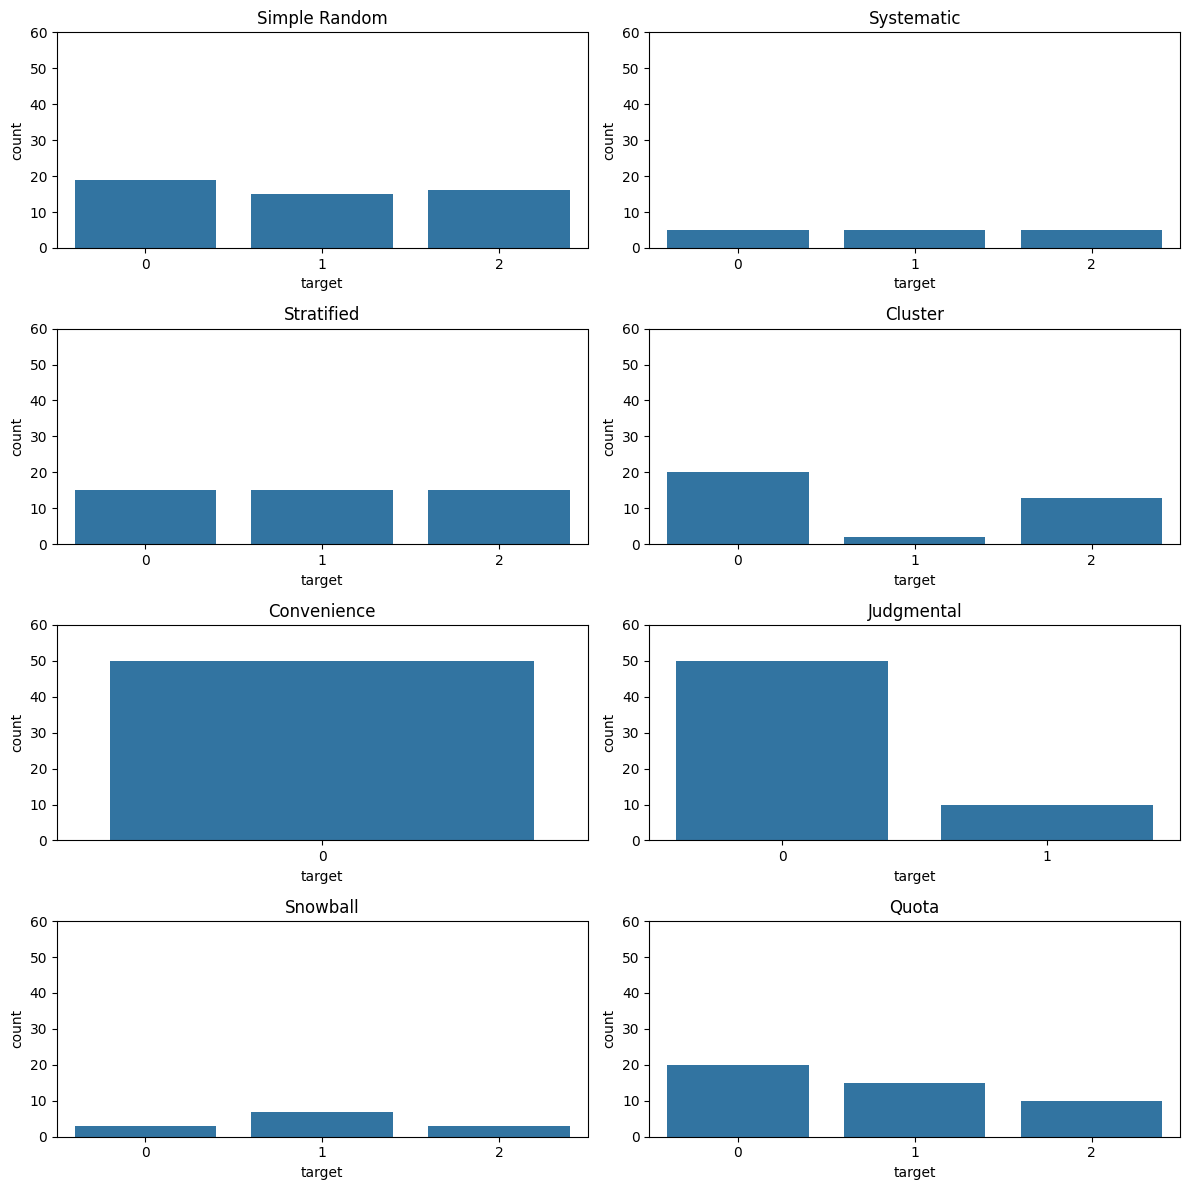

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution for all samples
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.ravel()

for ax, (name, sample) in zip(axes, samples.items()):
    sns.countplot(data=sample, x='target', ax=ax)
    ax.set_title(name)
    ax.set_ylim(0, max(df['target'].value_counts()) + 10)

plt.tight_layout()
plt.show()

## Practical Use Cases

- **Simple Random Sampling**: When every observation has equal chance; best for general surveys.
- **Systematic Sampling**: Good when data is ordered (e.g., time series) and periodicity isn’t an issue.
- **Stratified Sampling**: Use when classes are imbalanced and you want proportional representation.
- **Cluster Sampling**: Useful for geographically distributed data (e.g., select 2 cities and survey all residents).
- **Convenience Sampling**: Fast, but risky for bias; use for quick prototyping or low-stakes settings.
- **Judgmental Sampling**: Domain-driven; suitable when you know what you're looking for.
- **Snowball Sampling**: Often used in social network or rare population studies.
- **Quota Sampling**: When you need to meet a target distribution (e.g., by gender, age group).

